In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from f1analytics.vizHelper import vizTemplates as vt 
import seaborn as sns
import fastf1

In [3]:
spanishgp_q=fastf1.get_session(2024,'spain','q')
spanishgp_q.load()
spanishgp_r=fastf1.get_session(2024,'spain','r')
spanishgp_r.load()

In [4]:
spanishgp_qViz=vt.vizDataQuali(spanishgp_q)
spanishgp_rViz=vt.vizDataRace(spanishgp_r)

getting and enriching fastest laps telemetry...
getting and enriching all laps telemetry...
getting and enriching fastest laps telemetry...
getting and enriching all laps telemetry...


D:\f1analytics\src\f1analytics\vizHelper\vizTemplates.py:334: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  tyreAlphas = pd.concat(


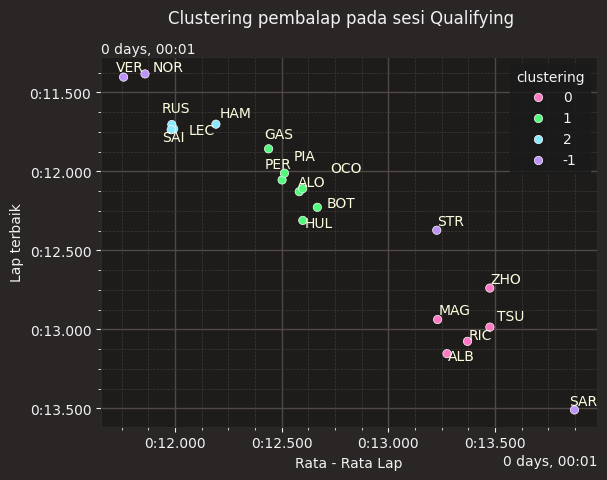

In [7]:
spanishgp_qViz.clusterAnalysis()

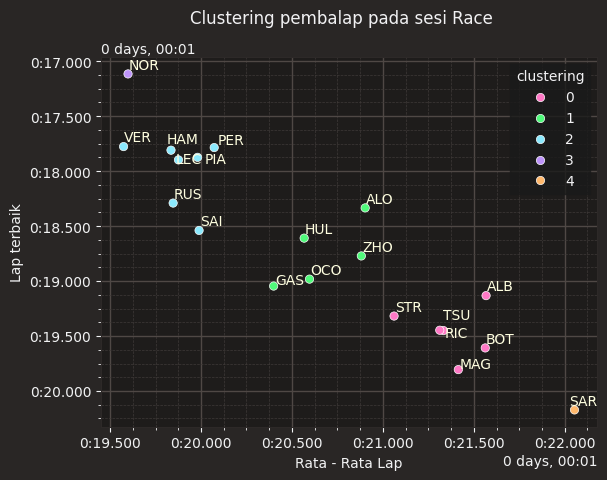

In [8]:
spanishgp_rViz.clusterAnalysis(min_samp=1,epsVar=0.6)

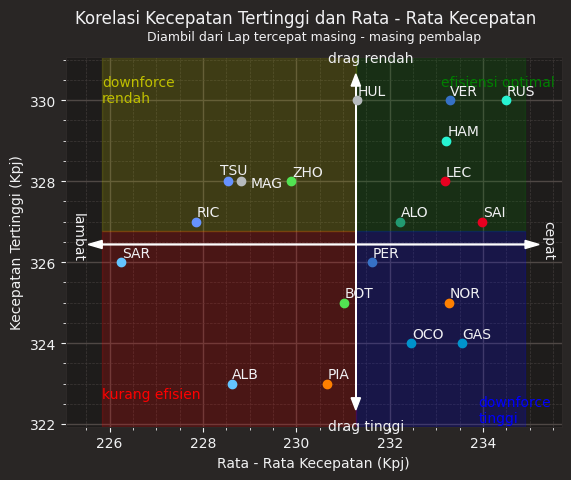

In [8]:
spanishgp_qViz.quadrantAnalysis()

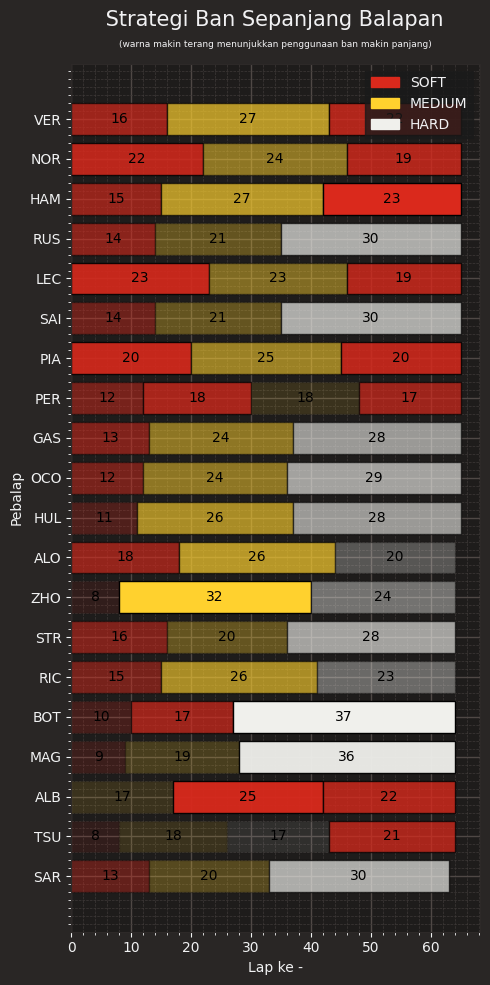

In [10]:
spanishgp_rViz.TyreStrats()

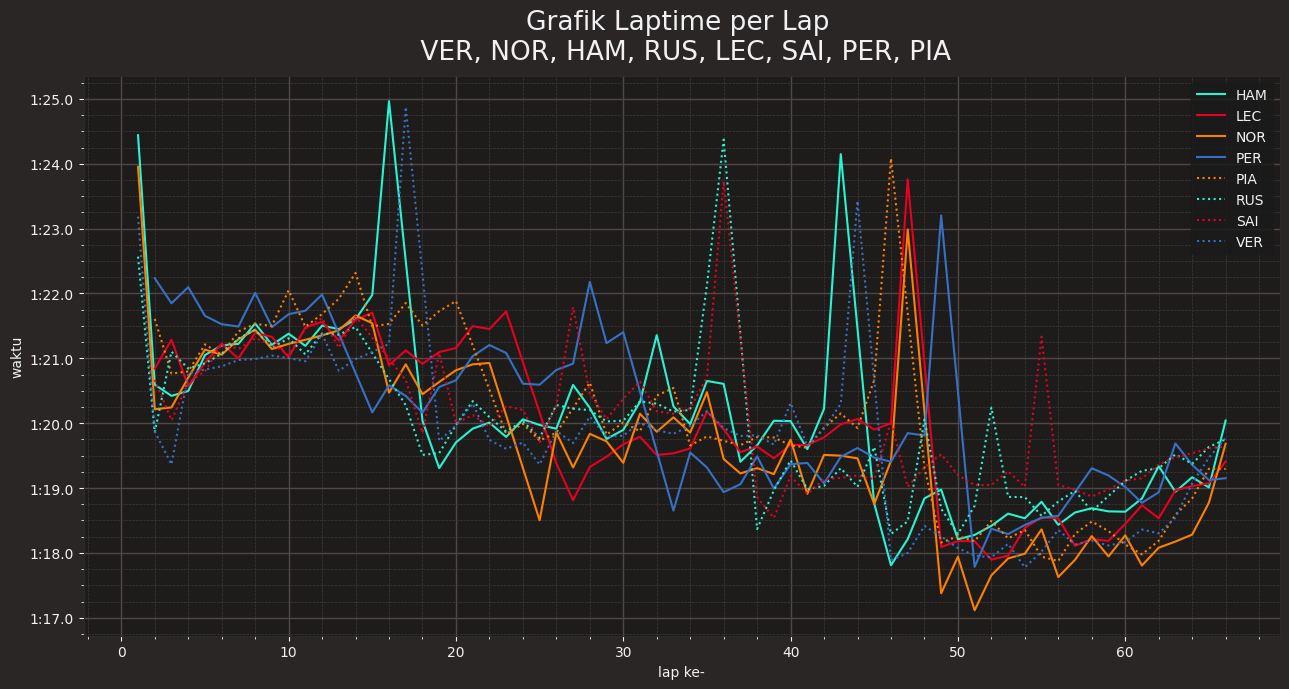

In [45]:
spanishgp_rViz.LinePlot(['VER','NOR','HAM','RUS','LEC','SAI','PER','PIA'],sec_under=25)

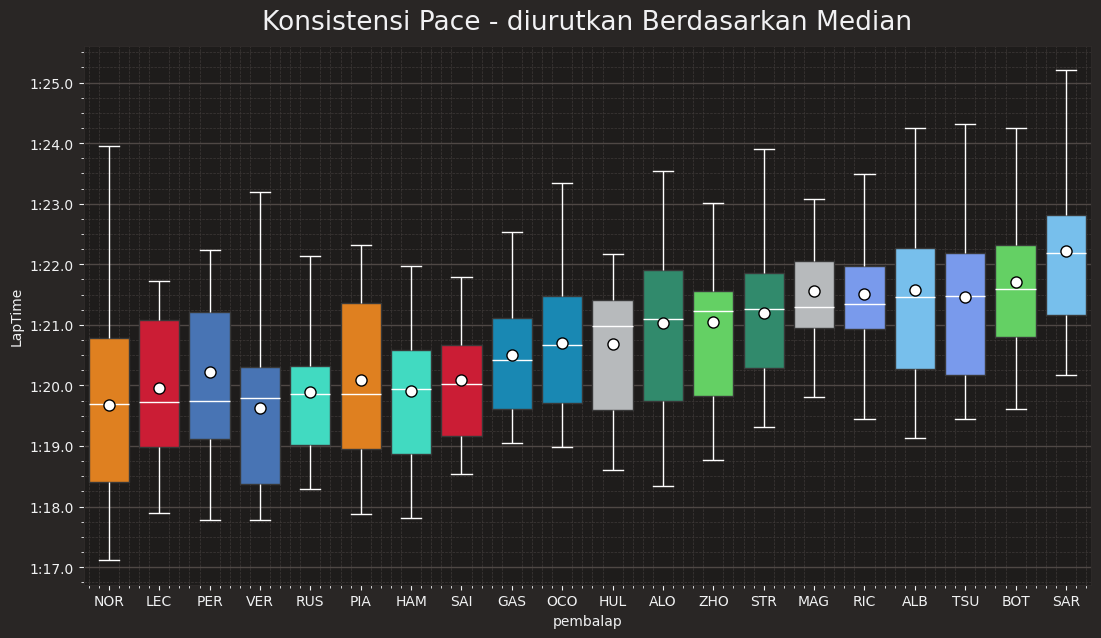

In [33]:
spanishgp_rViz.BoxPlot()

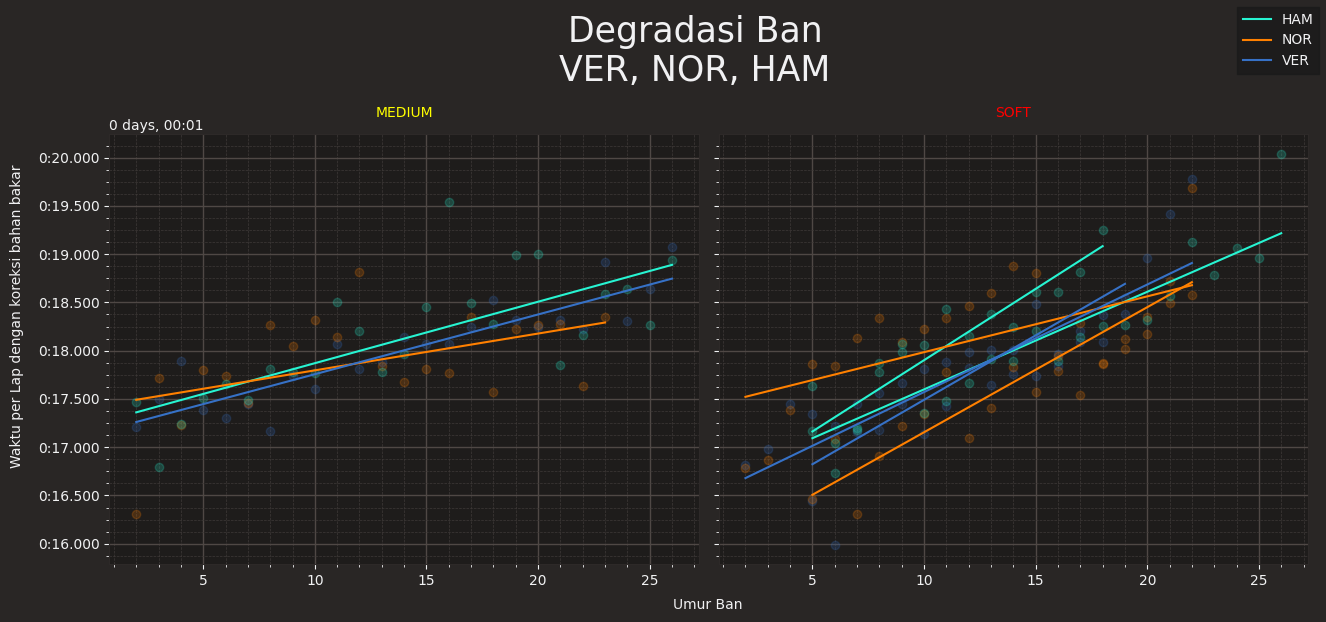

In [36]:
spanishgp_rViz.TyreDeg(['VER','NOR','HAM'])

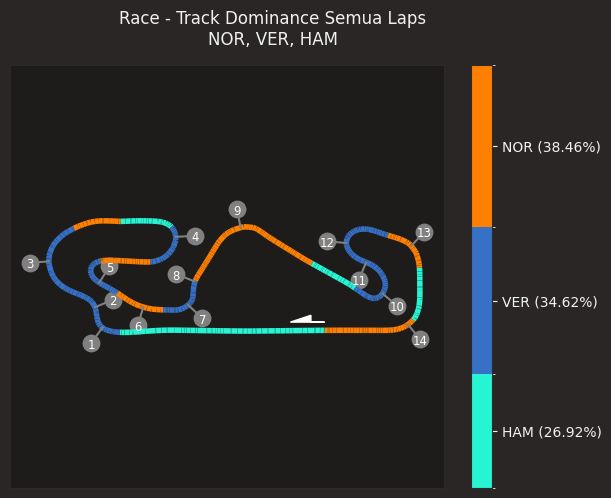

In [6]:
spanishgp_rViz.trackDominance(-500,0,drvList=['NOR','VER','HAM'],mode='average')

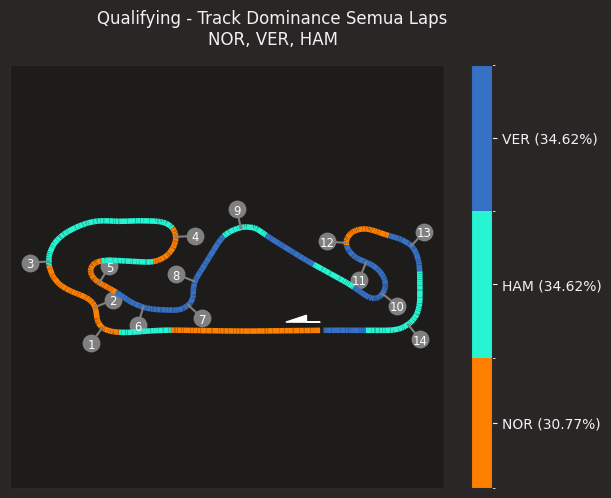

In [7]:
spanishgp_qViz.trackDominance(-500,0,drvList=['NOR','VER','HAM'],mode='average')

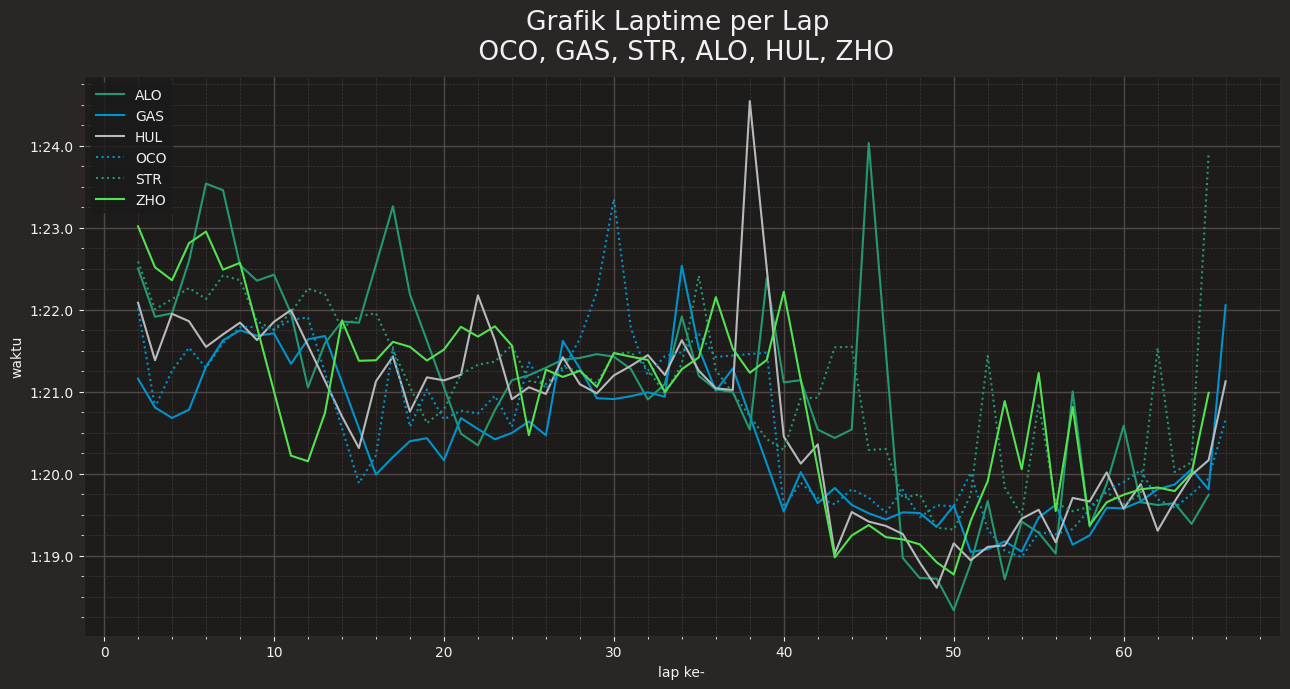

In [44]:
spanishgp_rViz.LinePlot(['OCO','GAS','STR','ALO','HUL','ZHO'],sec_under=25)

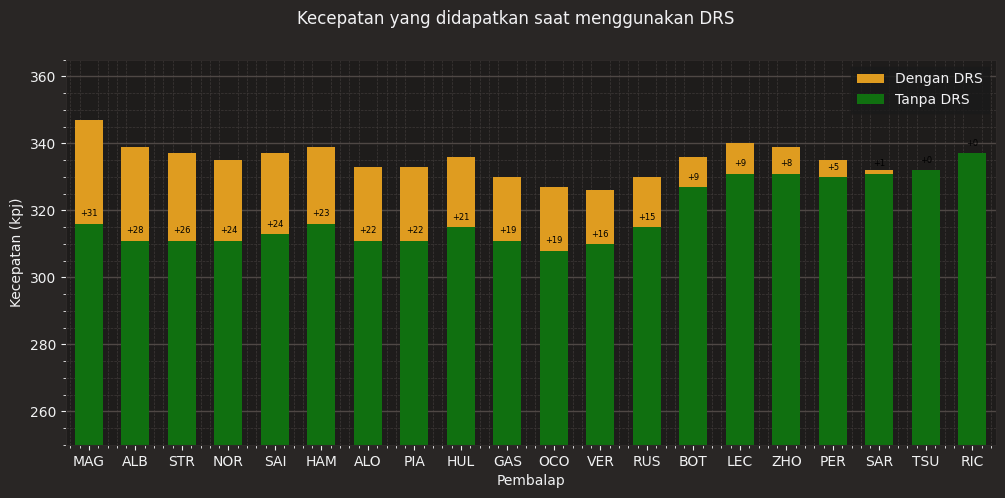

In [4]:
spanishgp_rViz.drsGain()

d:\f1analytics\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\f1analytics\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\f1analytics\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\f1analytics\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\f1analytics\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; y

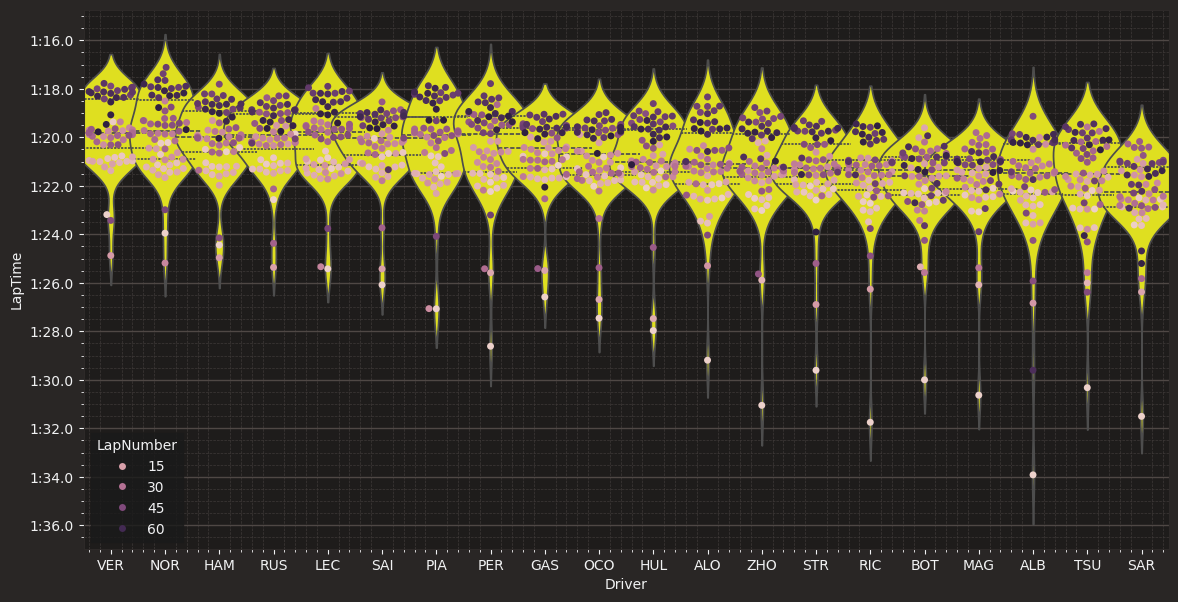

In [22]:
spanishgp_rViz.violin()

d:\f1analytics\.venv\Lib\site-packages\fastf1\utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
d:\f1analytics\.venv\Lib\site-packages\fastf1\utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


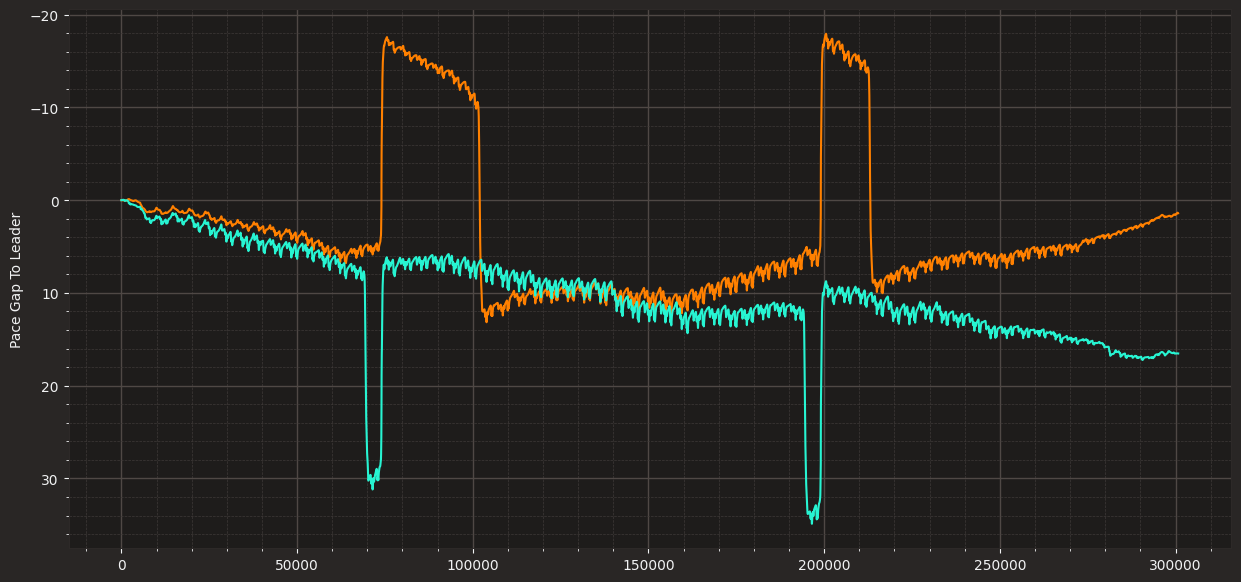

In [31]:
spanishgp_rViz.deltaTime(['NOR','HAM'],'VER',range(2,76)) #cut this out

In [34]:
stintsDF=spanishgp_r.laps.pick_drivers(['VER','NOR','HAM','RUS'])[['Driver','Stint','Compound','TyreLife','FreshTyre','LapTime', 'LapNumber']]

In [40]:
stintsDF=spanishgp_rViz.session_corrected.query("Driver in ['VER','NOR','HAM']")

In [41]:
stintsDF['Stint']=stintsDF['Stint'].astype(str)

C:\Users\Asani\AppData\Local\Temp\ipykernel_15964\519060817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stintsDF['Stint']=stintsDF['Stint'].astype(str)


(0.0009224207916666667, 0.0008813700648148149)

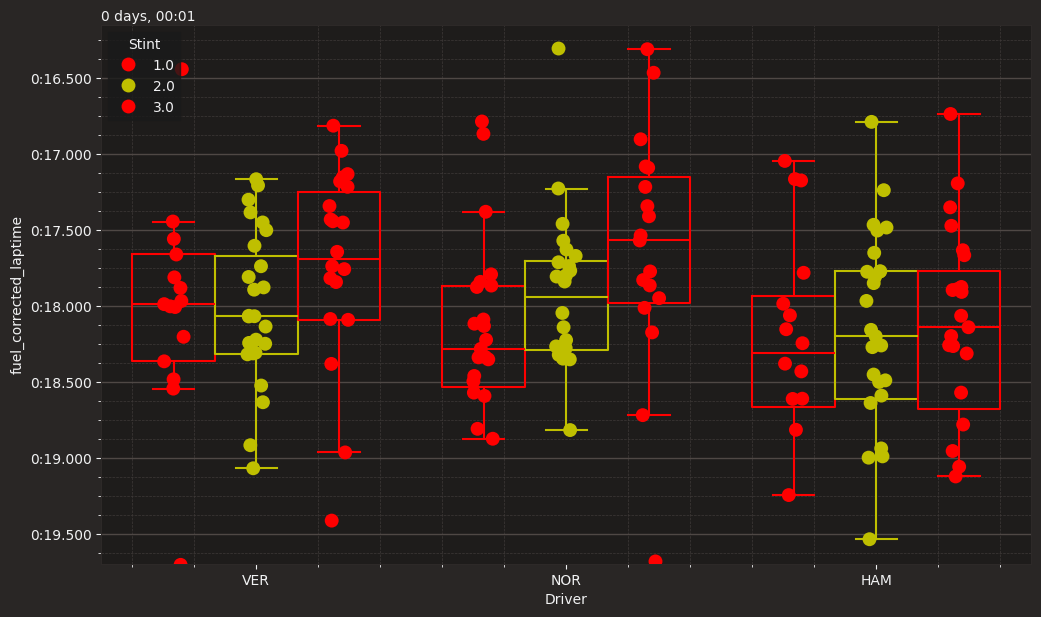

In [63]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(data=stintsDF,x='Driver', y='fuel_corrected_laptime', hue='Stint', palette=['r','y','r'], showfliers=False, fill=False, ax=ax, dodge=True, legend=False)
ylims=ax.get_ylim()
sns.stripplot(data=stintsDF, x='Driver', y='fuel_corrected_laptime', hue='Stint', palette=['r','y','r'], ax=ax, dodge=True,size=10)
ax.set_ylim(ylims)

<Axes: xlabel='Driver', ylabel='LapTime'>

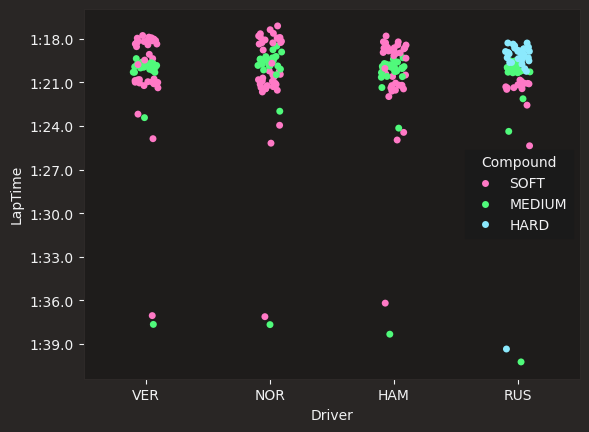

In [35]:
sns.stripplot(data=stintsDF,x='Driver',y='LapTime',hue='Compound')

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,fuel_corrected_laptime
0,0 days 00:58:20.587000,VER,1,0 days 00:01:23.186000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:32.054000,...,Red Bull Racing,0 days 00:56:57.100000,2024-06-23 13:03:14.418,1,2.0,False,,False,False,0 days 00:01:19.704561
1,0 days 00:59:40.458000,VER,1,0 days 00:01:19.871000,2.0,1.0,NaT,NaT,0 days 00:00:24.201000,0 days 00:00:31.900000,...,Red Bull Racing,0 days 00:58:20.587000,2024-06-23 13:04:37.905,1,2.0,False,,False,True,0 days 00:01:16.443121
2,0 days 01:00:59.822000,VER,1,0 days 00:01:19.364000,3.0,1.0,NaT,NaT,0 days 00:00:23.249000,0 days 00:00:32.086000,...,Red Bull Racing,0 days 00:59:40.458000,2024-06-23 13:05:57.776,1,1.0,False,,False,True,0 days 00:01:15.989682
3,0 days 01:02:20.588000,VER,1,0 days 00:01:20.766000,4.0,1.0,NaT,NaT,0 days 00:00:24.251000,0 days 00:00:32.339000,...,Red Bull Racing,0 days 01:00:59.822000,2024-06-23 13:07:17.140,1,1.0,False,,False,True,0 days 00:01:17.445242
4,0 days 01:03:41.415000,VER,1,0 days 00:01:20.827000,5.0,1.0,NaT,NaT,0 days 00:00:24.165000,0 days 00:00:32.393000,...,Red Bull Racing,0 days 01:02:20.588000,2024-06-23 13:08:37.906,1,1.0,False,,False,True,0 days 00:01:17.559803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0 days 02:19:52.998000,SAR,2,0 days 00:01:24.685000,60.0,3.0,NaT,NaT,0 days 00:00:24.072000,0 days 00:00:34.369000,...,Williams,0 days 02:18:28.313000,2024-06-23 14:24:45.631,1,20.0,False,,False,True,0 days 00:01:24.470758
1306,0 days 02:21:14.303000,SAR,2,0 days 00:01:21.305000,61.0,3.0,NaT,NaT,0 days 00:00:23.892000,0 days 00:00:32.790000,...,Williams,0 days 02:19:52.998000,2024-06-23 14:26:10.316,1,20.0,False,,False,True,0 days 00:01:21.144318
1307,0 days 02:22:35.679000,SAR,2,0 days 00:01:21.376000,62.0,3.0,NaT,NaT,0 days 00:00:23.876000,0 days 00:00:32.868000,...,Williams,0 days 02:21:14.303000,2024-06-23 14:27:31.621,1,20.0,False,,False,True,0 days 00:01:21.268879
1308,0 days 02:23:57.291000,SAR,2,0 days 00:01:21.612000,63.0,3.0,NaT,NaT,0 days 00:00:23.920000,0 days 00:00:32.884000,...,Williams,0 days 02:22:35.679000,2024-06-23 14:28:52.997,1,20.0,False,,False,True,0 days 00:01:21.558439
